In [1]:
#from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(projection='ortho', 
              lat_0=0, lon_0=0)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

x, y = map(0, 0)

map.plot(x, y, marker='D',color='m')

plt.show()


<Figure size 640x480 with 1 Axes>

(23412, 21)
['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


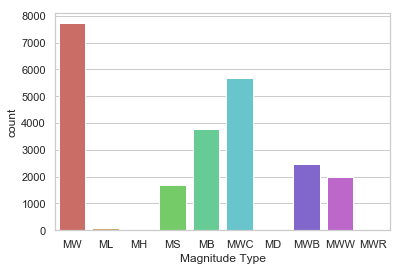

KeyError: "['Magnitude Seismic Stations', 'Horizontal Distance', 'Type', 'Depth Seismic Stations', 'Root Mean Square', 'Magnitude Error', 'Source', 'ID', 'Azimuthal Gap', 'Date', 'Horizontal Error', 'Magnitude Source', 'Time', 'Status', 'Magnitude Type', 'Location Source', 'Depth Error'] not in index"

In [11]:


# Importing predefined libraries required

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

plt.rc("font", size=14)

from sklearn.model_selection import cross_validate

# --------->  Using NAIVE_BAYES CLASSIFIER 

from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB



from sklearn.model_selection import train_test_split

import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#Here database.csv is the data on which basis we are going to predict. Make sure that both the files are in the same folder for succesful execution.

# Replace the file path below based on where the file is placed before running the code
data = pd.read_csv('database.csv')
#print(data)
#data.head()
#data = data.dropna()
print(data.shape)
print(list(data.columns))

# BAR PLOT  for our required data can be obtained with below syntax :

"""sns.countplot(x='Location Source',data=data, palette='hls')
sns.countplot(x='Magnitude Source',data=data, palette='hls') """

sns.countplot(x='Magnitude Type',data=data, palette='hls')


plt.show()

# --------->    Checking null values:

data.isnull().sum()

data2 = pd.get_dummies(data_clean, columns =['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status'] )


#---------->    To drop unknown coloumns 

sns.heatmap(data2.corr())
plt.show()


# To find correlation

#---------->    Train the model using the training sets


X = data2.iloc[:,1:]
y = data2.iloc[:,0]


#---------->    Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train.shape


#---------->    It shows Training data after splitting

#Create a Gaussian Classifier

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)



# ---------> Model Accuracy, how often is the classifier correct?

print('Accuracy of Naive_bayes classifier on test set: {:.2f}\n\n'.format(gnb.score(X_train, y_train)))



# ANOTHER METHOD for accuracy checking

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))




In [3]:
X_test.shape

(4, 182)

In [4]:
data.shape

(14, 21)

In [5]:
data = pd.read_csv('database.csv')
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [16]:

data_clean=data.drop(['Depth Error','Depth Seismic Stations','Magnitude Error','Magnitude Seismic Stations','Azimuthal Gap','Horizontal Distance','Horizontal Error','Root Mean Square'],axis=1)
data_clean.isnull().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      3
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [38]:
data_clean=data_clean.dropna()
data_clean.isnull().sum()

Latitude          0
Longitude         0
Depth             0
Magnitude         0
Magnitude Type    0
dtype: int64

In [27]:
data_clean=data_clean.drop(['ID','Source','Location Source','Magnitude Source','Status'],axis=1)
data_clean.head()

KeyError: "['ID' 'Source' 'Location Source' 'Magnitude Source' 'Status'] not found in axis"

In [2]:
pd.unique(data_clean[['Magnitude Type']].values.ravel('K'))

NameError: name 'data_clean' is not defined

In [31]:
data_clean=data_clean[(data_clean['Type']=='Earthquake')]

In [32]:
data_clean.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW


In [33]:
pd.unique(data_clean[['Type']].values.ravel('K'))

array(['Earthquake'], dtype=object)

In [35]:
data_clean=data_clean.drop(['Date','Time','Type'],axis=1)
data_clean.head()

,Latitude,Longitude,Depth,Magnitude,Magnitude Type
0,19.246,145.616,131.6,6.0,MW
1,1.863,127.352,80.0,5.8,MW
2,-20.579,-173.972,20.0,6.2,MW
3,-59.076,-23.557,15.0,5.8,MW
4,11.938,126.427,15.0,5.8,MW


In [36]:
data_clean.shape

(23229, 5)

In [10]:


# Importing predefined libraries required

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

plt.rc("font", size=14)

from sklearn.model_selection import cross_validate

# --------->  Using NAIVE_BAYES CLASSIFIER 

from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB



from sklearn.model_selection import train_test_split

import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#Here database.csv is the data on which basis we are going to predict. Make sure that both the files are in the same folder for succesful execution.

# Replace the file path below based on where the file is placed before running the code
data = pd.read_csv('database.csv')
#print(data)
#data.head()
#data = data.dropna()


data_clean=data.drop(['Depth Error','Depth Seismic Stations','Magnitude Error','Magnitude Seismic Stations','Azimuthal Gap','Horizontal Distance','Horizontal Error','Root Mean Square'],axis=1)
data_clean=data_clean.dropna()
data_clean=data_clean.drop(['Date','Time','Type','Magnitude Type'],axis=1)
data_clean=data_clean.drop(['ID','Source','Location Source','Magnitude Source','Status'],axis=1)

print(data_clean.shape)

X = data_clean.iloc[:,0:]
y = data_clean.iloc[:,1]


#---------->    Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train.shape


#---------->    It shows Training data after splitting

#Create a Gaussian Classifier

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)



# ---------> Model Accuracy, how often is the classifier correct?

print('Accuracy of Naive_bayes classifier on test set: {:.2f}\n\n'.format(gnb.score(X_train, y_train)))



# ANOTHER METHOD for accuracy checking

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))







(23409, 4)


ValueError: Unknown label type: (array([-179.997, -179.993, -179.989, ...,  179.98 ,  179.989,  179.998]),)

In [9]:
a=138.2029
b=36.2024
import pandas as pd
import numpy as np

data=pd.read_csv('database.csv')
x=data[(data["Longitude"] > a-15) & (data["Longitude"] < a+15) & (data["Latitude"] > b-15) & (data["Latitude"] < b+15) ]


l1=list(x["Longitude"])
l2=list(x["Latitude"])
m1=list(x["Magnitude"])
s=sum(m1)
l=len(m1)
avg=s//l
print(s,l,avg)
print(len(l1),len(l2),len(m1))

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(projection='mill', 
              lat_0=0, lon_0=0)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

x, y = map(a,b)

map.plot(x, y, marker='D',color='m')

plt.show()


if(avg > 8):
    print("Great Earthquake\n
    Itcan totally destroy communities\n 
    Hence it's not safe and is not recommended to invest heavy budgets in this location")
elif(avg > 7):
    print("Major Earthquake\n
    It can cause Serious Damage\n
    hence it's not safe and is not recommended to invest more budget in this location")
elif( avg > 6):
    print("May cause a lot of damage in very populated areas\n
    Investing in this location is a bit Risky ")
elif(avg > 5):
    print("May cause slight Damage to Buildings and other Structures \n
    Investing in this location is bit risky ")
elif( avg > 3.5 ):
    print("Earthquake is often felt but causes minor damage\n
    there may be no human loss \n
    Its a bit safer to invest in this Locality")
else:
    print("Usually not felt but can be recorded by seismograph \n
    Its safe to invest in this location \n
    It can be recommended for constructing buildings with heavy investments")
    
    

SyntaxError: EOL while scanning string literal (<ipython-input-9-171da4f0b901>, line 37)